## Iris flower classification is a very popular machine learning project. The iris dataset contains three classes of flowers Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.

In [1]:
#vERSICOLOR---- to differentiate we can use image processing---> focal length, pixel length, aperature length should be same
#take these constraints for this by the help of these constraints we can make our flowers data (SEPAL LENGTH -- SEPAL WIDTH) MAIN CONSTRAINTS

# K NEAREST NEIGHBOURS CLASSIFICATION

In [ ]:
#IT ALL DEPENDS ON K VALUE WE HAVE TO TAKE K VALUE BY UNDRSTANDING THE DATASET   ---->K IS RELATIVE VALUE

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [4]:
#these are the constraints

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#these are the datsets main cluster(flowers basically in which we have to differentiate)

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.shape

(150, 4)

In [11]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# here we added target column and given the iris target as target

In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# we create a function name as lambda and use it in the code by calling it again and again lambda is used to create a function -->X<--

In [14]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [15]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [16]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:150]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sepal length VS Sepal Width (Setosa Vs Versicolor)

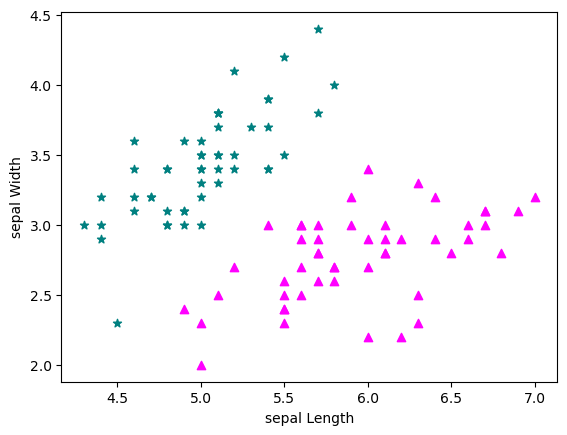

In [23]:
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color= "teal", marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color= "magenta", marker='^')


# Sepal length VS Sepal Width (Setosa Vs Verginica)

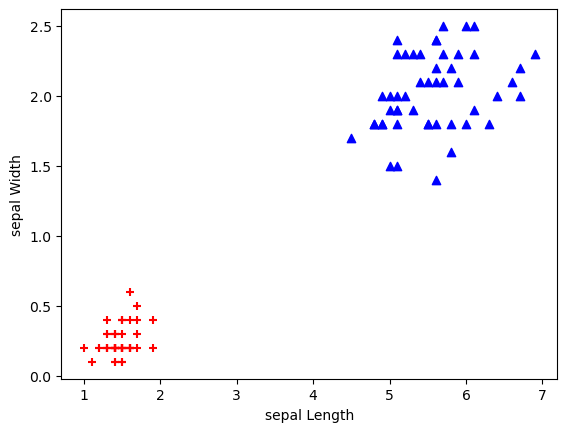

In [29]:
plt.xlabel('sepal Length')
plt.ylabel('sepal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color= "red", marker='+')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color= "blue", marker='^')

# Train test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X= df.drop(['target','flower_name'], axis='columns')
y= df.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=36)

# RANDOM STATE ---> RANDOM SPLIT = 36  IT WILL HELP US BY DOING THE SAME DATA WHICH IS HELP FOR US

In [33]:
len(X_train)

120

# 80 PERCENT DATA IS IN TEST DO 30 IS IN TEST AND 120 IS IN TRAIN 

In [34]:
len(X_test)

30

# THIS IS TEST DATA

# Creating KNN Model-->

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.score(X_test,y_test)

0.9666666666666667

# X's value is compared to y's value--->test data

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)